### 1.

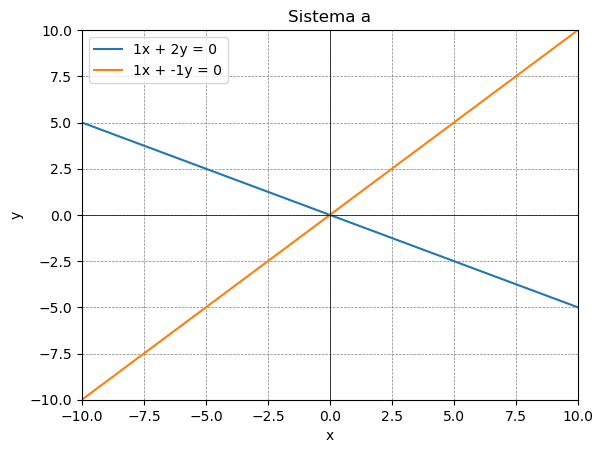

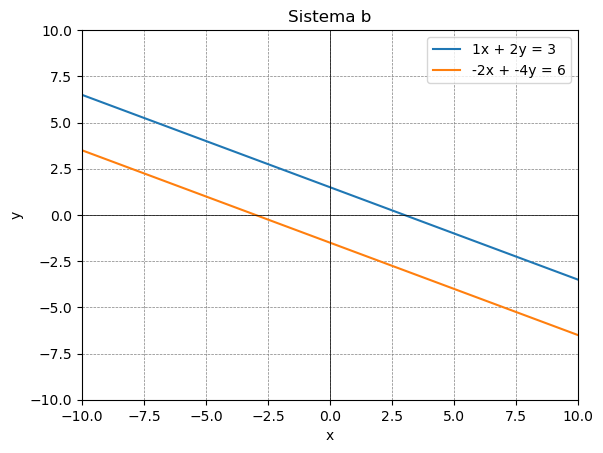

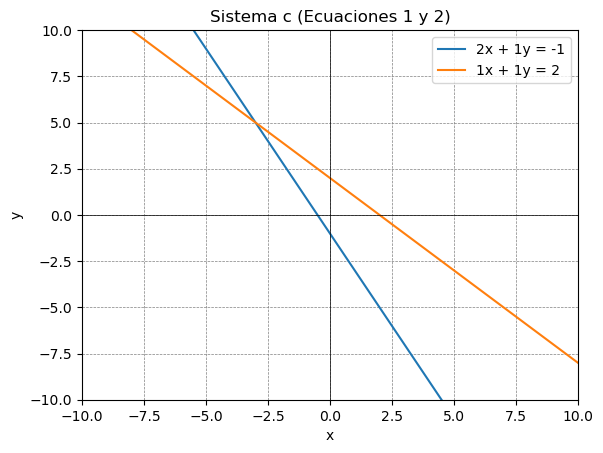

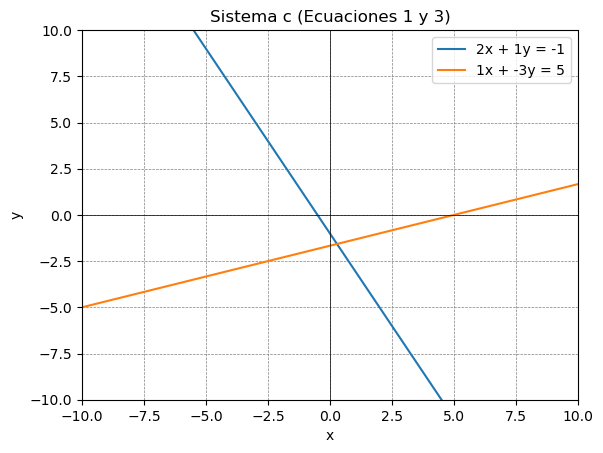

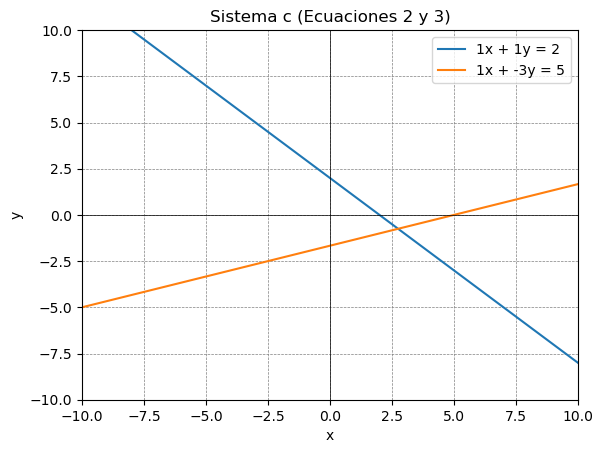

El sistema d involucra tres variables (x1, x2, x3) y no puede ser representado en un gráfico 2D.
Para resolver este sistema, se pueden usar métodos algebraicos como la eliminación de Gauss o métodos matriciales.


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Función para graficar los sistemas de ecuaciones
def plot_system(eq1, eq2, x_range=(-10, 10), title=''):
    x_vals = np.linspace(*x_range, 400)
    y_vals_eq1 = (eq1[2] - eq1[0]*x_vals) / eq1[1]
    y_vals_eq2 = (eq2[2] - eq2[0]*x_vals) / eq2[1]
    
    plt.plot(x_vals, y_vals_eq1, label=f'{eq1[0]}x + {eq1[1]}y = {eq1[2]}')
    plt.plot(x_vals, y_vals_eq2, label=f'{eq2[0]}x + {eq2[1]}y = {eq2[2]}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.title(title)
    plt.ylim(-10, 10)
    plt.xlim(x_range)
    plt.show()

# Definir los sistemas de ecuaciones (ax + by = c) como coeficientes a, b, c
systems = [
    [(1, 2, 0), (1, -1, 0)],   # Sistema a
    [(1, 2, 3), (-2, -4, 6)],  # Sistema b
    [(2, 1, -1), (1, 1, 2)],   # Sistema c, pares 1 y 2
    [(2, 1, -1), (1, -3, 5)],  # Sistema c, pares 1 y 3
    [(1, 1, 2), (1, -3, 5)]    # Sistema c, pares 2 y 3
]

# Graficar los sistemas a, b y c
plot_system(systems[0][0], systems[0][1], title='Sistema a')
plot_system(systems[1][0], systems[1][1], title='Sistema b')
plot_system(systems[2][0], systems[2][1], title='Sistema c (Ecuaciones 1 y 2)')
plot_system(systems[3][0], systems[3][1], title='Sistema c (Ecuaciones 1 y 3)')
plot_system(systems[4][0], systems[4][1], title='Sistema c (Ecuaciones 2 y 3)')

# Nota sobre el sistema d:
print("El sistema d involucra tres variables (x1, x2, x3) y no puede ser representado en un gráfico 2D.")
print("Para resolver este sistema, se pueden usar métodos algebraicos como la eliminación de Gauss o métodos matriciales.")

In [15]:
# Definir las matrices del sistema d
A = np.array([[2, 1, 1], [2, 4, -1]])
B = np.array([1, -1])

# Intentar resolver el sistema (si es posible)
try:
    solution = np.linalg.lstsq(A, B, rcond=None)[0]
    print("Solución del sistema d:")
    print(f"x1 = {solution[0]}, x2 = {solution[1]}, x3 = {solution[2]}")
except np.linalg.LinAlgError:
    print("El sistema d no tiene una solución única.")

Solución del sistema d:
x1 = 0.38961038961038946, x2 = -0.31168831168831157, x3 = 0.5324675324675323


### 2.

In [19]:
def gauss_elimination(A, b):
    n = len(b)
    # Convert to augmented matrix
    Ab = np.hstack([A, b.reshape(-1, 1)])

    for i in range(n):
        # Make the diagonal contain all ones
        pivot = Ab[i, i]
        Ab[i, :] /= pivot
        # Make the other elements in the current column zero
        for j in range(i + 1, n):
            Ab[j, :] -= Ab[j, i] * Ab[i, :]

    # Back substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = Ab[i, -1] - np.sum(Ab[i, :-1] * x)
    
    # Rounding the solution to 2 decimal places
    return np.round(x, 2)

# Defining the matrices for the systems in exercise 2
A1 = np.array([
    [-1, 4, 1],
    [5, 2/3, 2/3],
    [2, 1, 4]
])
b1 = np.array([8, 1, 11])

A2 = np.array([
    [4, 2, -1],
    [1/9, 1/9, -1/3],
    [1, 4, 2]
])
b2 = np.array([-5, -1, 9])

# Solving the systems
solution_1 = gauss_elimination(A1, b1)
solution_2 = gauss_elimination(A2, b2)

print("Solución Sistema 1:", solution_1)
print("Solución Sistema 2:", solution_2)

Solución Sistema 1: [-0.32  1.27  2.59]
Solución Sistema 2: [-1.  1.  3.]


### 3.

In [24]:
def gauss_elimination_with_pivoting(A, b):
    n = len(b)
    
    # Ensure floating-point operations by explicitly converting to float64
    Ab = np.hstack([A.astype(np.float64), b.reshape(-1, 1).astype(np.float64)]) 

    for i in range(n):
        max_row = np.argmax(np.abs(Ab[i:, i])) + i
        Ab[[i, max_row]] = Ab[[max_row, i]]  # Pivoting

        pivot = Ab[i, i]
        if pivot == 0:
            raise ValueError("Matrix is singular; no unique solution exists")

        Ab[i, :] /= pivot  # Division works smoothly now
        for j in range(i + 1, n):
            Ab[j, :] -= Ab[j, i] * Ab[i, :]

    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = Ab[i, -1] - np.sum(Ab[i, :-1] * x)

    return x

# Defining the matrices for the systems in exercise 3
A1 = np.array([
    [1, -1, 3],
    [3, -3, 1],
    [1, 1, 0]
])
b1 = np.array([2, -1, 3])

A2 = np.array([
    [2, -1.5, 3],
    [-1, 0, 2],
    [4, -4.5, 5]
])
b2 = np.array([1, 3, 1])

# Solving the systems
solution_1 = gauss_elimination_with_pivoting(A1, b1)
solution_2 = gauss_elimination_with_pivoting(A2, b2)

print("Solución Sistema 3a:", solution_1)
print("Solución Sistema 3b:", solution_2)

Solución Sistema 3a: [1.1875 1.8125 0.875 ]
Solución Sistema 3b: [-1.  0.  1.]


### 4.

In [111]:
def gauss_elimination_32bit(A, b):
    n = len(b)
    Ab = np.hstack([A.astype(np.float32), b.reshape(-1, 1).astype(np.float32)])

    for i in range(n):
        pivot = Ab[i, i]
        Ab[i, :] /= pivot
        for j in range(i + 1, n):
            Ab[j, :] -= Ab[j, i] * Ab[i, :]

    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = Ab[i, -1] - np.sum(Ab[i, :-1] * x)
    
    return x

# Defining the matrices for the systems in exercise 4
A1 = np.array([
    [1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1, 2]
], dtype=np.float32)
b1 = np.array([9, 8, 8], dtype=np.float32)

A2 = np.array([
    [3.333, 15920, -10.333],
    [2.222, 16.71, 9.612],
    [1.5611, 5.1791, 1.6852]
], dtype=np.float32)
b2 = np.array([15913, 28.544, 8.4254], dtype=np.float32)

A3 = np.array([
    [1, 1/2, 1/3, 1/4],
    [1/2, 1/3, 1/4, 1/5],
    [1/3, 1/4, 1/5, 1/6],
    [1/4, 1/5, 1/6, 1/7]
], dtype=np.float32)
b3 = np.array([1/6, 1/7, 1/8, 1/9], dtype=np.float32)

A4 = np.array([
    [2, 1, -1, 1, 3],
    [1, 0, 2, -1, 1],
    [0, -2, -1, 1, -1],
    [3, 1, -4, 0, 5],
    [1, -1, -1, -1, 1]
], dtype=np.float32)
b4 = np.array([7, 2, -5, 6, -3], dtype=np.float32)


# Solving the systems
solution_1 = gauss_elimination_32bit(A1, b1)
solution_2 = gauss_elimination_32bit(A2, b2)
solution_3 = gauss_elimination_32bit(A3, b3)
solution_4 = gauss_elimination_32bit(A4, b4)

print("Solución Sistema 4a:", solution_1)
print("Solución Sistema 4b:", solution_2)
print("Solución Sistema 4c:", solution_3)
print("Solución Sistema 4d:", solution_4)

Solución Sistema 4a: [-227.07665985  476.92261706 -177.69215393]
Solución Sistema 4b: [0.99969189 1.00000016 1.00010633]
Solución Sistema 4c: [-0.03174723  0.59525353 -2.38099092  2.77780318]
Solución Sistema 4d: [-4.66666684e+00 -1.31414051e-07  1.66666669e+00  2.00000003e+00
  5.33333349e+00]


### 5.

In [82]:
import sympy as sp

# Definimos la variable alfa
alfa = sp.symbols('alfa')

# Definimos la matriz de coeficientes y el vector de términos independientes
A = sp.Matrix([
    [1, -1, alfa],
    [-1, 2, -alfa],
    [alfa, 1, 1]
])
b = sp.Matrix([-2, 3, 2])

# Determinante de la matriz de coeficientes
det_A = A.det()
print(f"Determinante de A: {det_A}")

# Resolver el sistema para alfa = 0 (cualquier valor distinto de 1 y -2)
soluciones = A.subs(alfa, 0).LUsolve(b)
print(f"Soluciones para alfa = 0: {soluciones}")

# Verificar valores de alfa para los cuales el sistema no tiene soluciones (determinante cero)
alfa_sin_soluciones = sp.solve(det_A, alfa)
print(f"Valores de alfa para los cuales el sistema no tiene soluciones: {alfa_sin_soluciones}")

# Verificar consistencia del sistema para alfa = 1 y alfa = -2
for a in alfa_sin_soluciones:
    A_subs = A.subs(alfa, a)
    rango_A = A_subs.rank()
    rango_A_ampliada = A_subs.row_join(b).rank()
    if rango_A == rango_A_ampliada == 3:
        print(f"Para alfa = {a}, el sistema tiene una única solución")
    elif rango_A == rango_A_ampliada < 3:
        print(f"Para alfa = {a}, el sistema tiene infinitas soluciones")
    else:
        print(f"Para alfa = {a}, el sistema no tiene soluciones")
soluciones2 = A.subs(alfa, 3).LUsolve(b)
print(f"Para un a determinado a=3, la solución es: {soluciones2}")

Determinante de A: 1 - alfa**2
Soluciones para alfa = 0: Matrix([[-1], [1], [1]])
Valores de alfa para los cuales el sistema no tiene soluciones: [-1, 1]
Para alfa = -1, el sistema tiene infinitas soluciones
Para alfa = 1, el sistema no tiene soluciones
Para un a determinado a=3, la solución es: Matrix([[1/2], [1], [-1/2]])


### 6.

In [105]:
import numpy as np

# Definir las matrices y vectores dados
A = np.array([
    [1, 2, 0, 3],
    [1, 0, 2, 2],
    [0, 0, 1, 1]
])

x = np.array([1000, 500, 350, 400])
b = np.array([3500, 2700, 900])

# a. Verificar si hay suficiente alimento para satisfacer el consumo diario promedio
# Calcular Ax
Ax = np.dot(A, x)

# Verificar si Ax es igual a b
suficiente_alimento = np.allclose(Ax, b)
if suficiente_alimento == True:
    alimento = "Sí"
else:
    alimento = "No"
print("a. ¿Existe suficiente alimento para satisfacer el consumo promedio diario?", alimento)

# b. Calcular el número máximo de animales de cada especie que se podría agregar de forma individual
# La cantidad máxima adicional que se puede agregar se puede calcular resolviendo el sistema A * x = b
max_additional_animals = np.linalg.lstsq(A, b, rcond=None)[0] - x
print("b. Número máximo de animales de cada especie que se podría agregar de forma individual:", max_additional_animals)

# c. Si la especie 1 se extingue
# Ajustar la matriz A y el vector x eliminando la primera columna y el primer elemento respectivamente
A_no_species_1 = np.delete(A, 0, axis=1)
x_no_species_1 = np.delete(x, 0)

# Resolver el sistema para encontrar el incremento posible para las especies restantes
max_additional_no_species_1 = np.linalg.lstsq(A_no_species_1, b, rcond=None)[0] - x_no_species_1
print("c. Incremento posible para las especies restantes si la especie 1 se extingue:", max_additional_no_species_1)

# d. Si la especie 2 se extingue
# Ajustar la matriz A y el vector x eliminando la segunda columna y el segundo elemento respectivamente
A_no_species_2 = np.delete(A, 1, axis=1)
x_no_species_2 = np.delete(x, 1)

# Resolver el sistema para encontrar el incremento posible para las especies restantes
max_additional_no_species_2 = np.linalg.lstsq(A_no_species_2, b, rcond=None)[0] - x_no_species_2
print("d. Incremento posible para las especies restantes si la especie 2 se extingue:", max_additional_no_species_2)


a. ¿Existe suficiente alimento para satisfacer el consumo promedio diario? No
b. Número máximo de animales de cada especie que se podría agregar de forma individual: [-100.         -205.88235294 -120.58823529  270.58823529]
c. Incremento posible para las especies restantes si la especie 1 se extingue: [-121.17647059   -4.11764706  514.11764706]
d. Incremento posible para las especies restantes si la especie 2 se extingue: [-100.         -316.66666667  466.66666667]


Los números negativos indican que el sistema actual no tiene suficiente capacidad para sostener un incremento en la población de las especies actuales o las especies restantes si una especie se extingue. Para mantener un equilibrio, sería necesario ajustar las poblaciones actuales o mejorar el suministro de alimentos.

### 7.

In [113]:
def gauss_jordan(A, b):
    n = len(b)
    Ab = np.hstack([A, b.reshape(-1, 1)])

    for i in range(n):
        # Normalize pivot row
        Ab[i] /= Ab[i, i]
        # Make all other elements in current column zero
        for j in range(n):
            if i != j:
                Ab[j] -= Ab[j, i] * Ab[i]
    
    x = Ab[:, -1]
    return x

# Defining the matrices for the systems in exercise 4 (to use with Gauss-Jordan)
A1 = np.array([
    [1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1, 2]
], dtype=np.float32)
b1 = np.array([9, 8, 8], dtype=np.float32)

A2 = np.array([
    [3.333, 15920, -10.333],
    [2.222, 16.71, 9.612],
    [1.5611, 5.1791, 1.6852]
], dtype=np.float32)
b2 = np.array([15913, 28.544, 8.4254], dtype=np.float32)

A3 = np.array([
    [1, 1/2, 1/3, 1/4],
    [1/2, 1/3, 1/4, 1/5],
    [1/3, 1/4, 1/5, 1/6],
    [1/4, 1/5, 1/6, 1/7]
], dtype=np.float32)
b3 = np.array([1/6, 1/7, 1/8, 1/9], dtype=np.float32)

A4 = np.array([
    [2, 1, -1, 1, 3],
    [1, 0, 2, -1, 1],
    [0, -2, -1, 1, -1],
    [3, 1, -4, 0, 5],
    [1, -1, -1, -1, 1]
], dtype=np.float32)
b4 = np.array([7, 2, -5, 6, -3], dtype=np.float32)

# Solving the systems
solution_1 = gauss_jordan(A1, b1)
solution_2 = gauss_jordan(A2, b2)
solution_3 = gauss_jordan(A3, b3)
solution_4 = gauss_jordan(A4, b4)

print("Solución Sistema 7a:", solution_1)
print("Solución Sistema 7b:", solution_2)
print("Solución Sistema 7c:", solution_3)
print("Solución Sistema 7d:", solution_4)

Solución Sistema 7a: [-227.07668  476.9226  -177.69215]
Solución Sistema 7b: [0.9998865 1.0000001 1.0001063]
Solución Sistema 7c: [-0.03174722  0.5952536  -2.380991    2.7778032 ]
Solución Sistema 7d: [-4.666667   0.         1.6666666  2.         5.3333335]
